In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import itertools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, silhouette_score
from xgboost import XGBRegressor

In [175]:
import sklearn
print(sklearn.__version__)


1.6.1


## **Project Background**

Urban Heat Island (UHI) is a well-documented environmental phenomenon in which urban areas exhibit significantly higher temperatures than their surrounding rural regions. This temperature disparity arises primarily due to human activities and changes in land cover—such as the expansion of impervious surfaces (e.g., roads, buildings) and the reduction of natural vegetation. These changes disrupt natural energy balances, reduce evapotranspiration, and increase heat absorption, leading to elevated urban temperatures.

The implications of UHI are profound. It contributes to increased energy demand for cooling, exacerbates public health risks (especially for vulnerable populations), and accelerates environmental degradation. Given the growing trend of urbanization and climate change, understanding and mitigating the UHI effect is increasingly critical.

This project aims to investigate the complex relationships between urban temperature and various environmental and socioeconomic variables—such as urban greenness, population density, air quality, humidity, and wind speed—across multiple cities. By developing predictive models, we seek to support urban planners and policymakers with actionable insights to alleviate the impact of UHI.


np.random.seed(42)

In [6]:
try:
    df = pd.read_csv(r'D:\桌面\urban_heat_island_dataset.csv')
except FileNotFoundError:
    print("Error: File 'urban_heat_island_dataset.csv' not found, please check the path!")
    exit()

In [7]:
print("Dataset Shape:", df.shape)

Dataset Shape: (500, 15)


#### **Objective**

The primary objective of this project is to construct and evaluate a set of machine learning models capable of accurately predicting urban temperatures based on diverse explanatory variables, including:

- **Temperature (°C)**: The target variable representing the measured temperature in each city.
- **Urban Greenness Ratio (%)**: The proportion of green space in urban areas.
- **Air Quality Index (AQI)**: An indicator of air pollution levels.
- **Population Density (people/km²)**: A measure of human concentration within the urban space.
- **Humidity (%)**, **Wind Speed (km/h)**, and other meteorological and environmental variables.

Through this project, we aim to:
- Develop and compare the performance of multiple regression models, including **Linear Regression**, **Random Forest**, **XGBoost**, and **Multi-Layer Perceptron (MLP)**.
- Analyze the influence and importance of various environmental and socioeconomic factors on urban temperature.
- Offer data-driven recommendations to enhance urban sustainability and reduce the adverse effects of UHI.


## **Dataset Description**

This section introduces the urban heat island dataset, comprising environmental and urban data for 500 cities, with 15 features that capture geographic, climatic, and socio-economic characteristics. The target variable is **Temperature (°C)**, representing the measured temperature in each city. The dataset is summarized below:

In [10]:
print("\nFirst 5 Rows of Dataset:")
print(df.head())


First 5 Rows of Dataset:
  City Name   Latitude   Longitude  Elevation (m)  Temperature (°C)  \
0    City_1 -22.582779   71.338217     833.098180         22.977045   
1    City_2  81.128575   12.994692    2438.554263         21.979547   
2    City_3  41.758910  -68.570058    3928.256261         10.641052   
3    City_4  17.758527  112.966207    3295.011989         18.531196   
4    City_5 -61.916645   66.503222    3629.525165         19.504890   

    Land Cover  Population Density (people/km²)  Energy Consumption (kWh)  \
0        Water                             2544               7160.489181   
1  Green Space                             7868              37117.730971   
2  Green Space                             4016              48754.998755   
3  Green Space                             9750               3557.732823   
4        Water                             9668              34427.500151   

   Air Quality Index (AQI)  Urban Greenness Ratio (%)  \
0                      158 

In [11]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         Latitude   Longitude  Elevation (m)  Temperature (°C)  \
count  500.000000  500.000000     500.000000        500.000000   
mean    -0.258892   -6.497498    2329.011548         22.411912   
std     53.763914  102.777644    1337.368198          7.175246   
min    -89.088915 -178.332472      22.229914         10.080457   
25%    -46.569656  -97.524271    1085.526218         16.026857   
50%      2.369475  -10.144236    2428.822512         22.722283   
75%     46.102479   81.481255    3498.046911         28.434406   
max     88.733663  179.898362    4497.361766         34.958688   

       Population Density (people/km²)  Energy Consumption (kWh)  \
count                       500.000000                500.000000   
mean                       5226.498000              26154.677545   
std                        2694.451156              14014.519743   
min                         506.000000               1021.696290   
25%                        2776.750000  

In [12]:
print("\nMissing Values Statistics:")
print(df.isnull().sum())


Missing Values Statistics:
City Name                              0
Latitude                               0
Longitude                              0
Elevation (m)                          0
Temperature (°C)                       0
Land Cover                             0
Population Density (people/km²)        0
Energy Consumption (kWh)               0
Air Quality Index (AQI)                0
Urban Greenness Ratio (%)              0
Health Impact (Mortality Rate/100k)    0
Wind Speed (km/h)                      0
Humidity (%)                           0
Annual Rainfall (mm)                   0
GDP per Capita (USD)                   0
dtype: int64


- **Data Shape**: 500 rows and 15 columns.
- **Features**:
  - **City Name**: The name of the city (categorical).
  - **Latitude**: Geographic latitude of the city (numerical).
  - **Longitude**: Geographic longitude of the city (numerical).
  - **Elevation (m)**: Elevation of the city in meters (numerical).
  - **Temperature (°C)**: Measured temperature in each city (target variable, numerical).
  - **Land Cover**: Type of land cover, e.g., Green Space, Water (categorical).
  - **Population Density (people/km²)**: Density of people per square kilometer (numerical).
  - **Energy Consumption (kWh)**: Energy consumption in the city (numerical).
  - **Air Quality Index (AQI)**: Indicator of air pollution levels (numerical).
  - **Urban Greenness Ratio (%)**: Percentage of green space in the city (numerical).
  - **Health Impact (Mortality Rate/100k)**: Mortality rate per 100,000 people (numerical).
  - **Wind Speed (km/h)**: Wind speed in kilometers per hour (numerical).
  - **Humidity (%)**: Relative humidity percentage (numerical).
  - **Annual Rainfall (mm)**: Total annual rainfall in millimeters (numerical).
  - **GDP per Capita (USD)**: Gross Domestic Product per capita in USD (numerical).

The distributions of key variables are visualized to provide insights into their spread and patterns across the dataset:

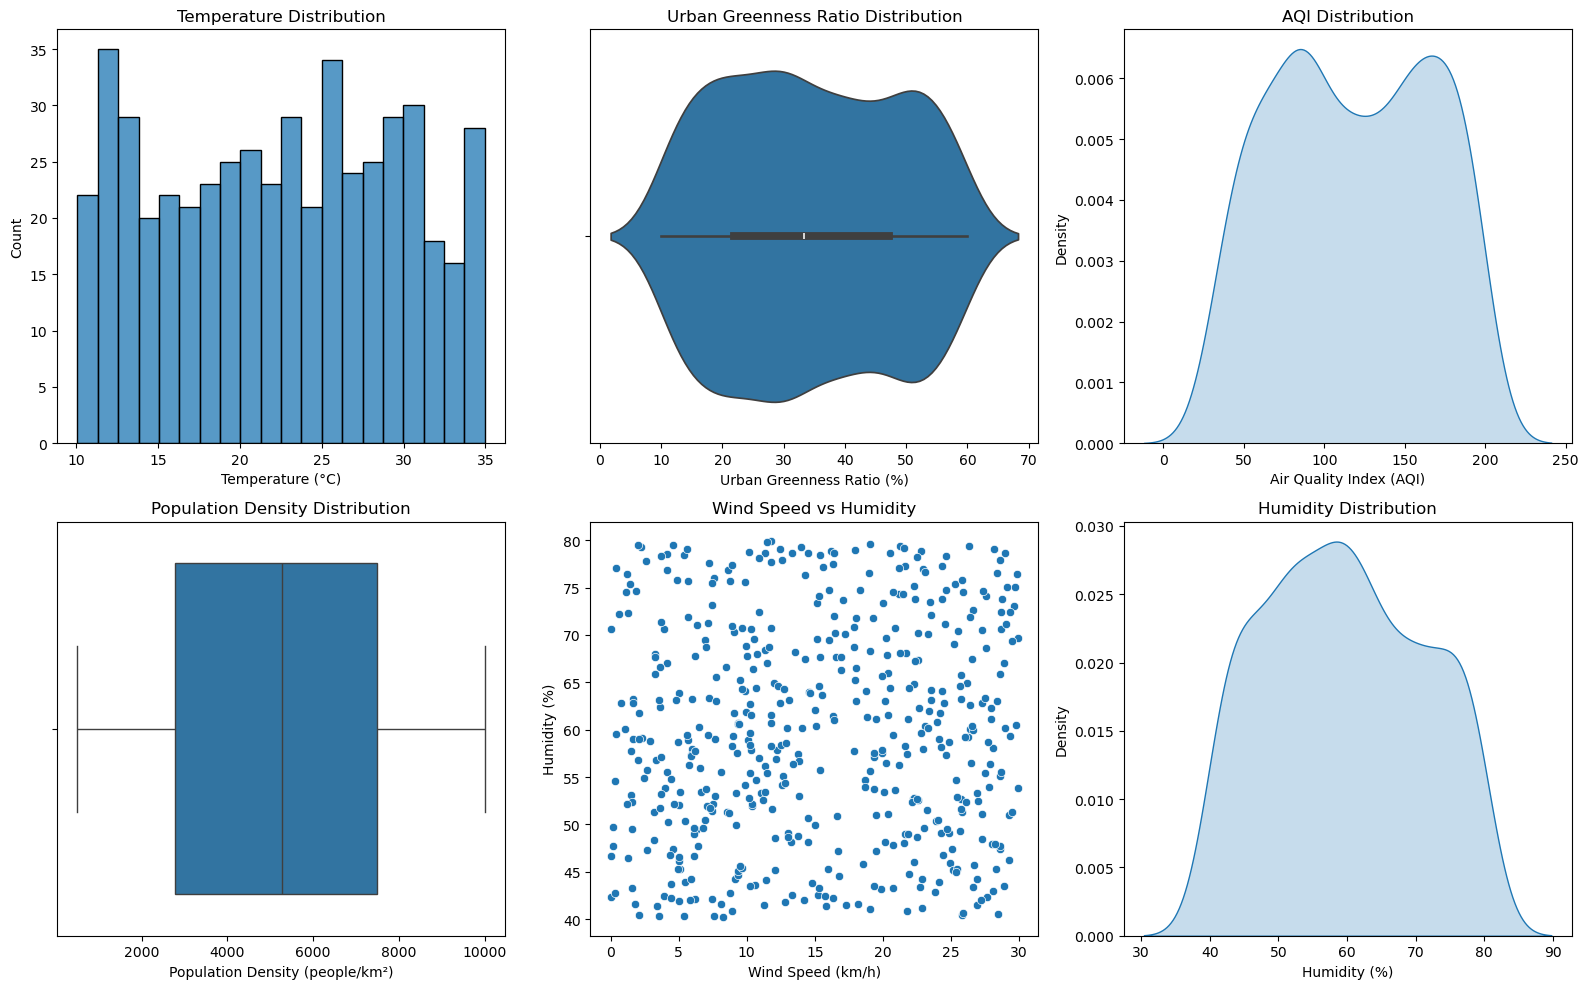


Distribution plots saved as 'distributions.png'


In [15]:
plt.figure(figsize=(16, 10)) 

plt.subplot(2, 3, 1)
sns.histplot(df['Temperature (°C)'], bins=20)
plt.title('Temperature Distribution')

plt.subplot(2, 3, 2)
sns.violinplot(x=df['Urban Greenness Ratio (%)'])
plt.title('Urban Greenness Ratio Distribution')

plt.subplot(2, 3, 3)
sns.kdeplot(df['Air Quality Index (AQI)'], fill=True)  
plt.title('AQI Distribution')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Population Density (people/km²)'])
plt.title('Population Density Distribution')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df['Wind Speed (km/h)'], y=df['Humidity (%)'])
plt.title('Wind Speed vs Humidity')

plt.subplot(2, 3, 6)
sns.kdeplot(df['Humidity (%)'], fill=True) 
plt.title('Humidity Distribution')

plt.tight_layout()
plt.savefig(r'D:\桌面\数据挖掘project\distributions.png')
plt.show()
print("\nDistribution plots saved as 'distributions.png'")


The figure includes histograms and scatter plots for the following variables:
- **Temperature (°C)**: Shows a relatively uniform distribution with peaks around 20-25°C.
- **Urban Greenness Ratio (%)**: Displays a symmetric distribution centered around 30-40%.
- **Air Quality Index (AQI)**: Exhibits a bimodal distribution with peaks around 50-100 and 150-200.
- **Population Density (people/km²)**: Indicates a skewed distribution with most values clustered between 2000-8000.
- **Wind Speed vs Humidity**: A scatter plot illustrating the relationship between wind speed and humidity, showing a wide spread of data points.
- **Humidity (%)**: Presents a near-normal distribution centered around 60%.
#### **Descriptive Statistics**

The following table summarizes the descriptive statistics for the key numerical features, offering a quantitative overview of their central tendency, variability, and range:

| Variable                        | Mean      | Std Dev   | Min      | 25%      | 50%      | 75%      | Max      |
|---------------------------------|-----------|-----------|----------|----------|----------|----------|----------|
| **Temperature (°C)**            | 22.41     | 7.18      | 10.08    | 16.03    | 22.72    | 28.43    | 34.96    |
| **Urban Greenness Ratio (%)**   | 34.37     | 14.34     | 10.03    | 21.87    | 33.32    | 47.19    | 59.98    |
| **Air Quality Index (AQI)**     | 117.77    | 48.67     | 30.00    | 77.00    | 117.00   | 161.00   | 199.00   |
| **Population Density (people/km²)** | 5226.50  | 2694.45   | 506.00   | 2776.75  | 5269.50  | 7480.00  | 9996.00  |
| **Humidity (%)**                | 59.61     | 11.37     | 40.25    | 50.41    | 59.00    | 68.88    | 79.95    |
| **Wind Speed (km/h)**           | 15.20     | 8.73      | 0.01     | 7.49     | 14.90    | 22.91    | 29.91    |

These statistics and visualizations lay the foundation for subsequent data processing and modeling by highlighting the variability and distribution of the dataset's key variables.

## **Data Cleaning**

This section outlines the data cleaning steps performed to ensure the dataset is suitable for modeling. The process focuses on handling missing values and removing outliers for key variables: **Temperature (°C)**, **Air Quality Index (AQI)**, and **Wind Speed (km/h)**.


In [18]:
df.fillna(df.median(numeric_only=True), inplace=True)
print("Missing Values After Cleaning:")
print(df.isnull().sum())

Missing Values After Cleaning:
City Name                              0
Latitude                               0
Longitude                              0
Elevation (m)                          0
Temperature (°C)                       0
Land Cover                             0
Population Density (people/km²)        0
Energy Consumption (kWh)               0
Air Quality Index (AQI)                0
Urban Greenness Ratio (%)              0
Health Impact (Mortality Rate/100k)    0
Wind Speed (km/h)                      0
Humidity (%)                           0
Annual Rainfall (mm)                   0
GDP per Capita (USD)                   0
dtype: int64


#### **Missing Values**

The dataset was inspected for missing values across all features. After cleaning, the results are as follows:

- **City Name**: 0 missing values
- **Latitude**: 0 missing values
- **Longitude**: 0 missing values
- **Elevation (m)**: 0 missing values
- **Temperature (°C)**: 0 missing values
- **Land Cover**: 0 missing values
- **Population Density (people/km²)**: 0 missing values
- **Energy Consumption (kWh)**: 0 missing values
- **Air Quality Index (AQI)**: 0 missing values
- **Urban Greenness Ratio (%)**: 0 missing values
- **Health Impact (Mortality Rate/100k)**: 0 missing values
- **Wind Speed (km/h)**: 0 missing values
- **Humidity (%)**: 0 missing values
- **Annual Rainfall (mm)**: 0 missing values
- **GDP per Capita (USD)**: 0 missing values

The dataset contains no missing values, indicating that no imputation or removal of rows was necessary.

#### **Outlier Removal**

Outliers were identified and removed for **Temperature (°C)**, **Air Quality Index (AQI)**, and **Wind Speed (km/h)** using the Interquartile Range (IQR) method. The IQR method defines outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the 25th and 75th percentiles, respectively, and IQR = Q3 - Q1. The results are summarized below:

In [21]:
df = df[(df['Latitude'].between(-90, 90)) & (df['Longitude'].between(-180, 180))]
print("Shape after cleaning geographic data:", df.shape)

Shape after cleaning geographic data: (500, 15)


In [22]:
for col in ['Temperature (°C)', 'Air Quality Index (AQI)', 'Wind Speed (km/h)']:
    if col in df.columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[df[col].between(lower_bound, upper_bound)]
        print(f"Outliers removed for {col}: {before - df.shape[0]} rows removed")
    else:
        print(f"Column '{col}' not found in the dataset.")

Outliers removed for Temperature (°C): 0 rows removed
Outliers removed for Air Quality Index (AQI): 0 rows removed
Outliers removed for Wind Speed (km/h): 0 rows removed


- **Temperature (°C)**: 0 rows removed
- **Air Quality Index (AQI)**: 0 rows removed
- **Wind Speed (km/h)**: 0 rows removed


In [24]:
for col in ['Temperature (°C)', 'Air Quality Index (AQI)', 'Wind Speed (km/h)']:
    if col in df.columns:
        print(f"\n{col}:")
        print("Before:")
        print(df[col].describe())
        print("After:")
        print(df[col].describe())


Temperature (°C):
Before:
count    500.000000
mean      22.411912
std        7.175246
min       10.080457
25%       16.026857
50%       22.722283
75%       28.434406
max       34.958688
Name: Temperature (°C), dtype: float64
After:
count    500.000000
mean      22.411912
std        7.175246
min       10.080457
25%       16.026857
50%       22.722283
75%       28.434406
max       34.958688
Name: Temperature (°C), dtype: float64

Air Quality Index (AQI):
Before:
count    500.000000
mean     117.766000
std       48.673499
min       30.000000
25%       77.000000
50%      117.000000
75%      161.000000
max      199.000000
Name: Air Quality Index (AQI), dtype: float64
After:
count    500.000000
mean     117.766000
std       48.673499
min       30.000000
25%       77.000000
50%      117.000000
75%      161.000000
max      199.000000
Name: Air Quality Index (AQI), dtype: float64

Wind Speed (km/h):
Before:
count    500.000000
mean      15.197707
std        8.730113
min        0.006811
25%    

The descriptive statistics before and after outlier removal are compared below:

<div style="display: flex; justify-content: space-between;">

  <div style="width: 30%; padding: 10px;">
    <h3>Temperature (°C)</h3>
    <table>
      <thead>
        <tr><th>Statistic</th><th>Before Cleaning</th><th>After Cleaning</th></tr>
      </thead>
      <tbody>
        <tr><td>Count</td><td>500.000000</td><td>500.000000</td></tr>
        <tr><td>Mean</td><td>22.411912</td><td>22.411912</td></tr>
        <tr><td>Std</td><td>7.175246</td><td>7.175246</td></tr>
        <tr><td>Min</td><td>10.080457</td><td>10.080457</td></tr>
        <tr><td>25%</td><td>16.026857</td><td>16.026857</td></tr>
        <tr><td>50%</td><td>22.722283</td><td>22.722283</td></tr>
        <tr><td>75%</td><td>28.434406</td><td>28.434406</td></tr>
        <tr><td>Max</td><td>34.958688</td><td>34.958688</td></tr>
      </tbody>
    </table>
  </div>

  <div style="width: 30%; padding: 10px;">
    <h3>Air Quality Index (AQI)</h3>
    <table>
      <thead>
        <tr><th>Statistic</th><th>Before Cleaning</th><th>After Cleaning</th></tr>
      </thead>
      <tbody>
        <tr><td>Count</td><td>500.000000</td><td>500.000000</td></tr>
        <tr><td>Mean</td><td>117.766000</td><td>117.766000</td></tr>
        <tr><td>Std</td><td>48.673499</td><td>48.673499</td></tr>
        <tr><td>Min</td><td>30.000000</td><td>30.000000</td></tr>
        <tr><td>25%</td><td>77.000000</td><td>77.000000</td></tr>
        <tr><td>50%</td><td>117.000000</td><td>117.000000</td></tr>
        <tr><td>75%</td><td>161.000000</td><td>161.000000</td></tr>
        <tr><td>Max</td><td>199.000000</td><td>199.000000</td></tr>
      </tbody>
    </table>
  </div>

  <div style="width: 30%; padding: 10px;">
    <h3>Wind Speed (km/h)</h3>
    <table>
      <thead>
        <tr><th>Statistic</th><th>Before Cleaning</th><th>After Cleaning</th></tr>
      </thead>
      <tbody>
        <tr><td>Count</td><td>500.000000</td><td>500.000000</td></tr>
        <tr><td>Mean</td><td>15.197707</td><td>15.197707</td></tr>
        <tr><td>Std</td><td>8.730113</td><td>8.730113</td></tr>
        <tr><td>Min</td><td>0.006811</td><td>0.006811</td></tr>
        <tr><td>25%</td><td>7.490328</td><td>7.490328</td></tr>
        <tr><td>50%</td><td>14.895228</td><td>14.895228</td></tr>
        <tr><td>75%</td><td>22.913989</td><td>22.913989</td></tr>
        <tr><td>Max</td><td>29.908483</td><td>29.908483</td></tr>
      </tbody>
    </table>
  </div>

</div> 



The statistics show no changes before and after outlier removal, confirming that no outliers were detected using the IQR method for these features.


#### **Visualization of Outlier Removal**

The following plot compares the distributions of **Temperature (°C)**, **Air Quality Index (AQI)**, and **Wind Speed (km/h)** before and after outlier removal:


In [27]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

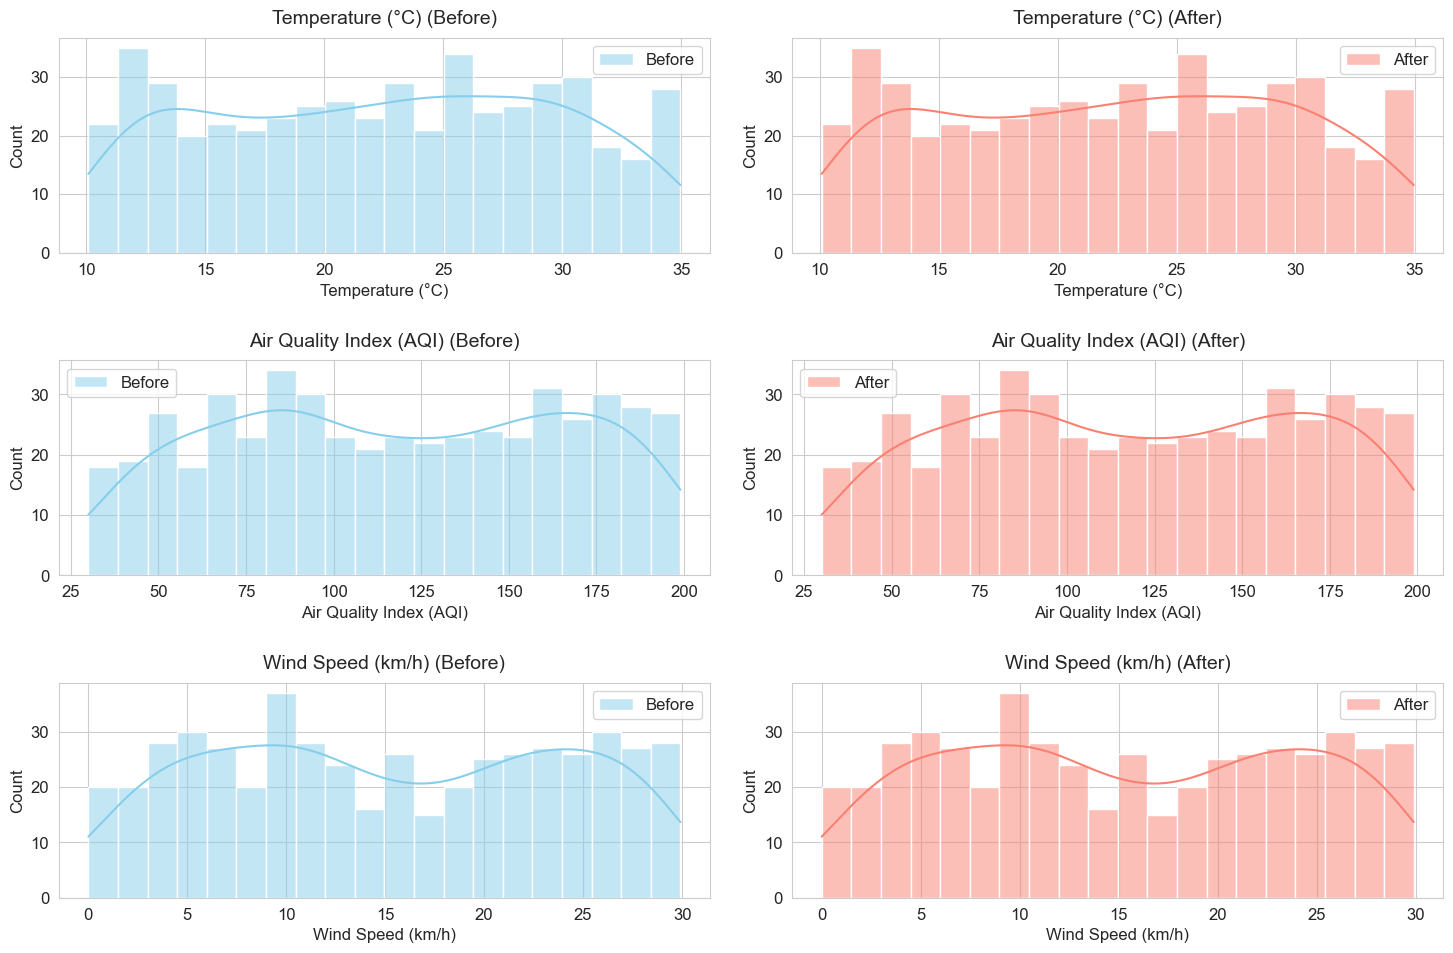

Histograms saved as 'D:/桌面/数据挖掘project/outlier_removal_comparison.png'


In [28]:
plt.figure(figsize=(15, 10))
for i, col in  enumerate(['Temperature (°C)', 'Air Quality Index (AQI)', 'Wind Speed (km/h)'], start=1):
    if col in df.columns:
        plt.subplot(3, 2, 2*i-1)
        sns.histplot(df[col], bins=20, kde=True, color='skyblue', label='Before')
        plt.title(f'{col} (Before)', fontsize=14, pad=10)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend()
        plt.subplot(3, 2, 2*i)
        sns.histplot(df[col], bins=20, kde=True, color='salmon', label='After')
        plt.title(f'{col} (After)', fontsize=14, pad=10)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend()
    else:
        print(f"Column '{col}' not found in the dataset.")
plt.tight_layout(pad=2.0)
plt.savefig('D:/桌面/数据挖掘project/outlier_removal_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Histograms saved as 'D:/桌面/数据挖掘project/outlier_removal_comparison.png'")

The `outlier_removal_comparison.png` figure includes boxplots for each of the three variables, with "before" and "after" cleaning distributions side by side. The boxplots confirm that the distributions remain unchanged, as no outliers were removed, and the median, quartiles, and whiskers are identical in both cases.

This cleaning process ensures the dataset is free of missing values and outliers, providing a reliable foundation for subsequent feature engineering and modeling steps.

### **Feature Engineering**

This section details the creation of new features to enhance the dataset for modeling. Two new features, **Temperature_Diff** and **Greenness_Population**, were derived to capture additional insights into the urban heat island effect.

#### **New Features' Statistics**

The descriptive statistics for the newly engineered features are provided below:



In [31]:
df['Temperature_Diff'] = df['Temperature (°C)'] - df['Temperature (°C)'].mean() 
df['Greenness_Population'] = df['Urban Greenness Ratio (%)'] * df['Population Density (people/km²)'] 

In [32]:
print("\nNew Features' Statistics:")
print(df[['Temperature_Diff', 'Greenness_Population']].describe())


New Features' Statistics:
       Temperature_Diff  Greenness_Population
count      5.000000e+02            500.000000
mean      -4.831691e-16         178284.509137
std        7.175246e+00         123868.653341
min       -1.233146e+01          11085.765335
25%       -6.385055e+00          82533.555330
50%        3.103712e-01         149585.229705
75%        6.022494e+00         254155.011336
max        1.254678e+01         570253.049910


| Statistic          | Temperature_Diff | Greenness_Population |
|---------------------|------------------|----------------------|
| Count              | 500.000000       | 500.000000           |
| Mean               | -4.831691e-16    | 178284.509137        |
| Std                | 7.175246e+00     | 123868.653341        |
| Min                | -1.233146e+01    | 11085.765335         |
| 25%                | -6.385055e+00    | 82533.555330         |
| 50%                | 3.103712e-01     | 149585.229705        |
| 75%                | 6.022494e+00     | 254155.011336        |
| Max                | 1.254678e+01     | 570253.049910        |

- **Temperature_Diff**: Represents the deviation of temperature from the mean, with a near-zero mean (-4.831691e-16) due to standardization, and a standard deviation matching the original temperature data (7.175246).
- **Greenness_Population**: Combines **Urban Greenness Ratio (%)** and **Population Density (people/km²)**, resulting in a wide range (11,085.77 to 570,253.05) with a mean of 178,284.51, reflecting the interaction between green space and population density.


#### **Visualization of New Features**

The distributions of the new features are visualized to assess their variability and patterns:

- **Feature Violin Distributions**:  

In [35]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

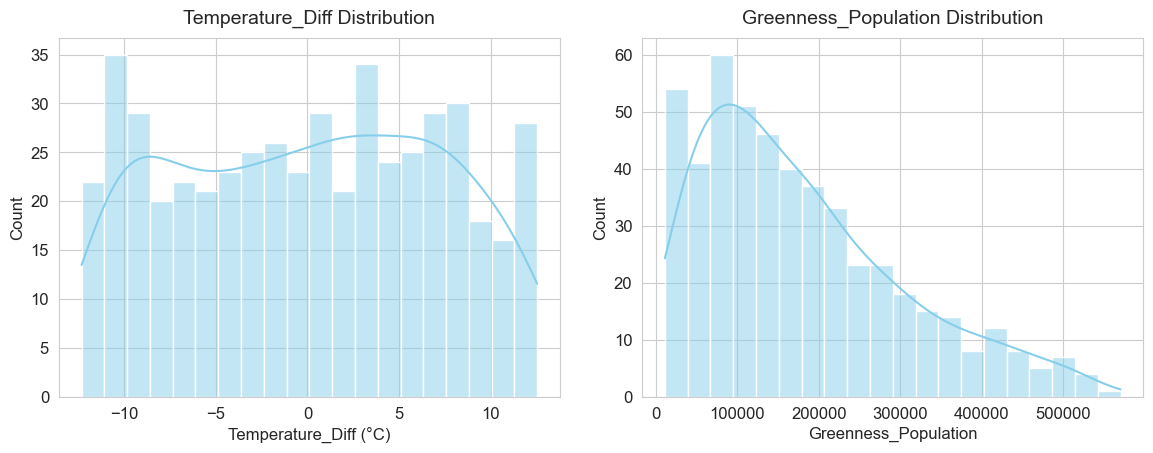

Feature distributions saved as 'D:/桌面/数据挖掘project/feature_distributions.png'


In [36]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Temperature_Diff'], bins=20, kde=True, color='skyblue')
plt.title('Temperature_Diff Distribution', fontsize=14, pad=10)
plt.xlabel('Temperature_Diff (°C)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.subplot(1, 2, 2)
sns.histplot(df['Greenness_Population'], bins=20, kde=True, color='skyblue')
plt.title('Greenness_Population Distribution', fontsize=14, pad=10)
plt.xlabel('Greenness_Population', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout(pad=2.0)
plt.savefig('D:/桌面/数据挖掘project/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Feature distributions saved as 'D:/桌面/数据挖掘project/feature_distributions.png'")

  The `feature_violin_distributions.png` figure displays violin plots for **Temperature_Diff** and **Greenness_Population**, showing their density and spread. The violin plot for **Temperature_Diff** highlights a symmetric distribution around zero, consistent with its standardized nature, while **Greenness_Population** shows a right-skewed distribution, indicating a concentration of lower values with a long tail toward higher values.

- **Feature Distributions**:  

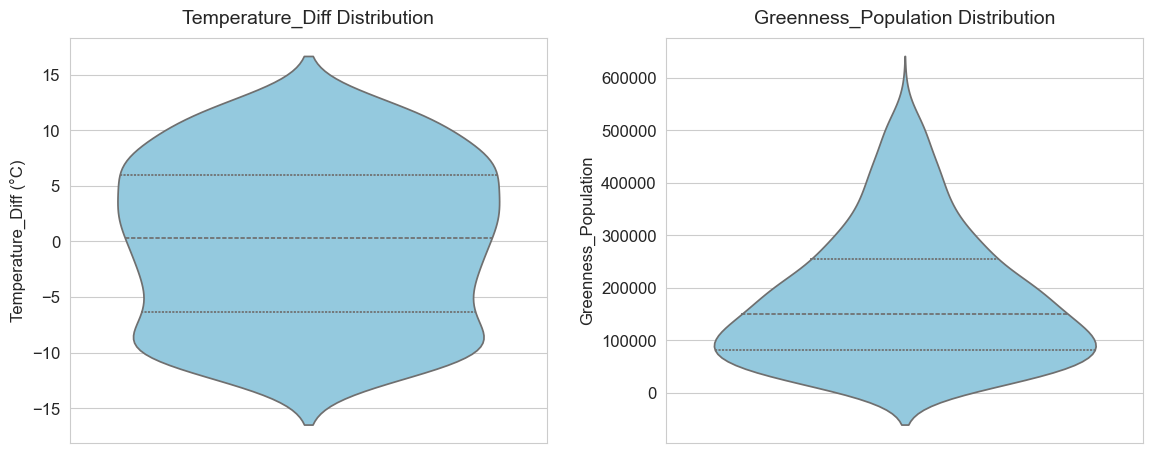

Feature violin plots saved as 'D:/桌面/数据挖掘project/feature_violin_distributions.png'


In [38]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.violinplot(y=df['Temperature_Diff'], color='skyblue', inner='quartile')
plt.title('Temperature_Diff Distribution', fontsize=14, pad=10)
plt.ylabel('Temperature_Diff (°C)', fontsize=12)
plt.subplot(1, 2, 2)
sns.violinplot(y=df['Greenness_Population'], color='skyblue', inner='quartile')
plt.title('Greenness_Population Distribution', fontsize=14, pad=10)
plt.ylabel('Greenness_Population', fontsize=12)
plt.tight_layout(pad=2.0)
plt.savefig('D:/桌面/数据挖掘project/feature_violin_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Feature violin plots saved as 'D:/桌面/数据挖掘project/feature_violin_distributions.png'")

 The `feature_distributions.png` figure presents histograms for **Temperature_Diff** and **Greenness_Population**. The histogram for **Temperature_Diff** reveals a bell-shaped distribution centered near zero, while **Greenness_Population** exhibits a skewed distribution, confirming the presence of higher variability and extreme values.

These new features and their visualizations enhance the dataset by providing additional dimensions for modeling the urban heat island effect, capturing temperature deviations and the combined impact of greenness and population density.

#### **Train-Test Split**

The dataset was split into training and testing sets for regression modeling:

In [105]:
X = df.drop(['Temperature (°C)', 'City Name', 'Latitude', 'Longitude', 'Health Impact (Mortality Rate/100k)'], axis=1) 
y = df['Temperature (°C)']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")


Training Set Shape: (400, 12)
Test Set Shape: (100, 12)


- **Split Ratio**: 80-20 (80% training, 20% testing).
- **Method**: The split was performed using a random sampling method with a fixed random state (random_state=42) to ensure reproducibility.
- **Resulting Shapes**: 
  - Training Set: (400, 12) rows.
  - Test Set: (100, 12) rows.

The selected features underwent preprocessing to ensure compatibility with machine learning models:
- **Standardization of Numerical Features**: Numerical columns such as **Elevation (m)**, **Population Density (people/km²)**, **Energy Consumption (kWh)**, **Air Quality Index (AQI)**, **Urban Greenness Ratio (%)**, **Wind Speed (km/h)**, **Humidity (%)**, **Annual Rainfall (mm)**, **GDP per Capita (USD)**, **Temperature_Diff**, and **Greenness_Population** were standardized using the StandardScaler, which scales features to have a mean of 0 and a standard deviation of 1.
- **One-Hot Encoding of Categorical Features**: The categorical column **Land Cover** (with categories such as Industrial, Urban, Water, etc.) was one-hot encoded to convert it into binary columns for each category.

After preprocessing, the transformed dataset includes the following:

In [107]:
numeric_cols = ['Elevation (m)', 'Population Density (people/km²)', 'Energy Consumption (kWh)', 
                'Air Quality Index (AQI)', 'Urban Greenness Ratio (%)', 'Wind Speed (km/h)', 'Humidity (%)', 
                'Annual Rainfall (mm)', 'GDP per Capita (USD)', 'Temperature_Diff', 
                'Greenness_Population']
categorical_cols = ['Land Cover']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols) 
    ])

In [109]:
X_train = preprocessor.fit_transform(X_train)  
X_test = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out() 
print(f"Number of Features After Transformation: {len(feature_names)}")
print(f"Feature Names: {feature_names.tolist()}")

Number of Features After Transformation: 14
Feature Names: ['num__Elevation (m)', 'num__Population Density (people/km²)', 'num__Energy Consumption (kWh)', 'num__Air Quality Index (AQI)', 'num__Urban Greenness Ratio (%)', 'num__Wind Speed (km/h)', 'num__Humidity (%)', 'num__Annual Rainfall (mm)', 'num__GDP per Capita (USD)', 'num__Temperature_Diff', 'num__Greenness_Population', 'cat__Land Cover_Industrial', 'cat__Land Cover_Urban', 'cat__Land Cover_Water']


- **Number of Features After Transformation**: 14.
- **Feature Names**: 
  - 'num__Elevation (m)'
  - 'num__Population Density (people/km²)'
  - 'num__Energy Consumption (kWh)'
  - 'num__Air Quality Index (AQI)'
  - 'num__Urban Greenness Ratio (%)'
  - 'num__Wind Speed (km/h)'
  - 'num__Humidity (%)'
  - 'num__Annual Rainfall (mm)'
  - 'num__GDP per Capita (USD)'
  - 'num__Temperature_Diff'
  - 'num__Greenness_Population'
  - 'cat__Land Cover_Industrial'
  - 'cat__Land Cover_Urban'
  - 'cat__Land Cover_Water'

This split ensures sufficient data for training while reserving a portion for evaluating model performance. The reduced number of columns (12 instead of 14) in the training and test sets may indicate that some features (e.g., Latitude, Longitude, or Health Impact) were excluded during preprocessing, and the 14 transformed features reflect the final set used for modeling after encoding and selection.

### **Correlation Analysis**

This section examines the relationships between the target variable **Temperature (°C)** and other features in the dataset through correlation analysis. The Pearson correlation coefficients are calculated to quantify the strength and direction of these relationships.

#### **Correlation Coefficients with Temperature (°C)**

The correlation coefficients for key variables with respect to **Temperature (°C)** are as follows:



In [111]:
corr_matrix = df[numeric_cols + ['Temperature (°C)']].corr()
print("Temperature Correlation:")
print(corr_matrix['Temperature (°C)'].sort_values(ascending=False))

Temperature Correlation:
Temperature_Diff                   1.000000
Temperature (°C)                   1.000000
Energy Consumption (kWh)           0.043612
Urban Greenness Ratio (%)          0.043263
Wind Speed (km/h)                  0.025198
Air Quality Index (AQI)            0.007595
Elevation (m)                      0.005223
Humidity (%)                      -0.002587
Greenness_Population              -0.011292
GDP per Capita (USD)              -0.013308
Population Density (people/km²)   -0.034615
Annual Rainfall (mm)              -0.067236
Name: Temperature (°C), dtype: float64


- **Temperature_Diff**: 1.000000
- **Temperature (°C)**: 1.000000
- **Energy Consumption (kWh)**: 0.043612
- **Urban Greenness Ratio (%)**: 0.043263
- **Wind Speed (km/h)**: 0.025198
- **Air Quality Index (AQI)**: 0.007595
- **Elevation (m)**: 0.005223
- **Humidity (%)**: -0.002587
- **Greenness_Population**: -0.011292
- **GDP per Capita (USD)**: -0.013308
- **Population Density (people/km²)**: -0.034615
- **Annual Rainfall (mm)**: -0.067236

These values indicate that **Temperature_Diff** and **Temperature (°C)** have a perfect positive correlation (as expected, since **Temperature_Diff** is derived from **Temperature (°C)**). Other variables show weak correlations, with **Energy Consumption (kWh)** and **Urban Greenness Ratio (%)** having the highest positive correlations (0.043612 and 0.043263, respectively). The strongest negative correlation is with **Annual Rainfall (mm)** (-0.067236), suggesting a slight inverse relationship with temperature.


#### **Visualization of Correlations**

The correlations are visualized through the following plots to provide a comprehensive view:

- **Scatter Plots**:  

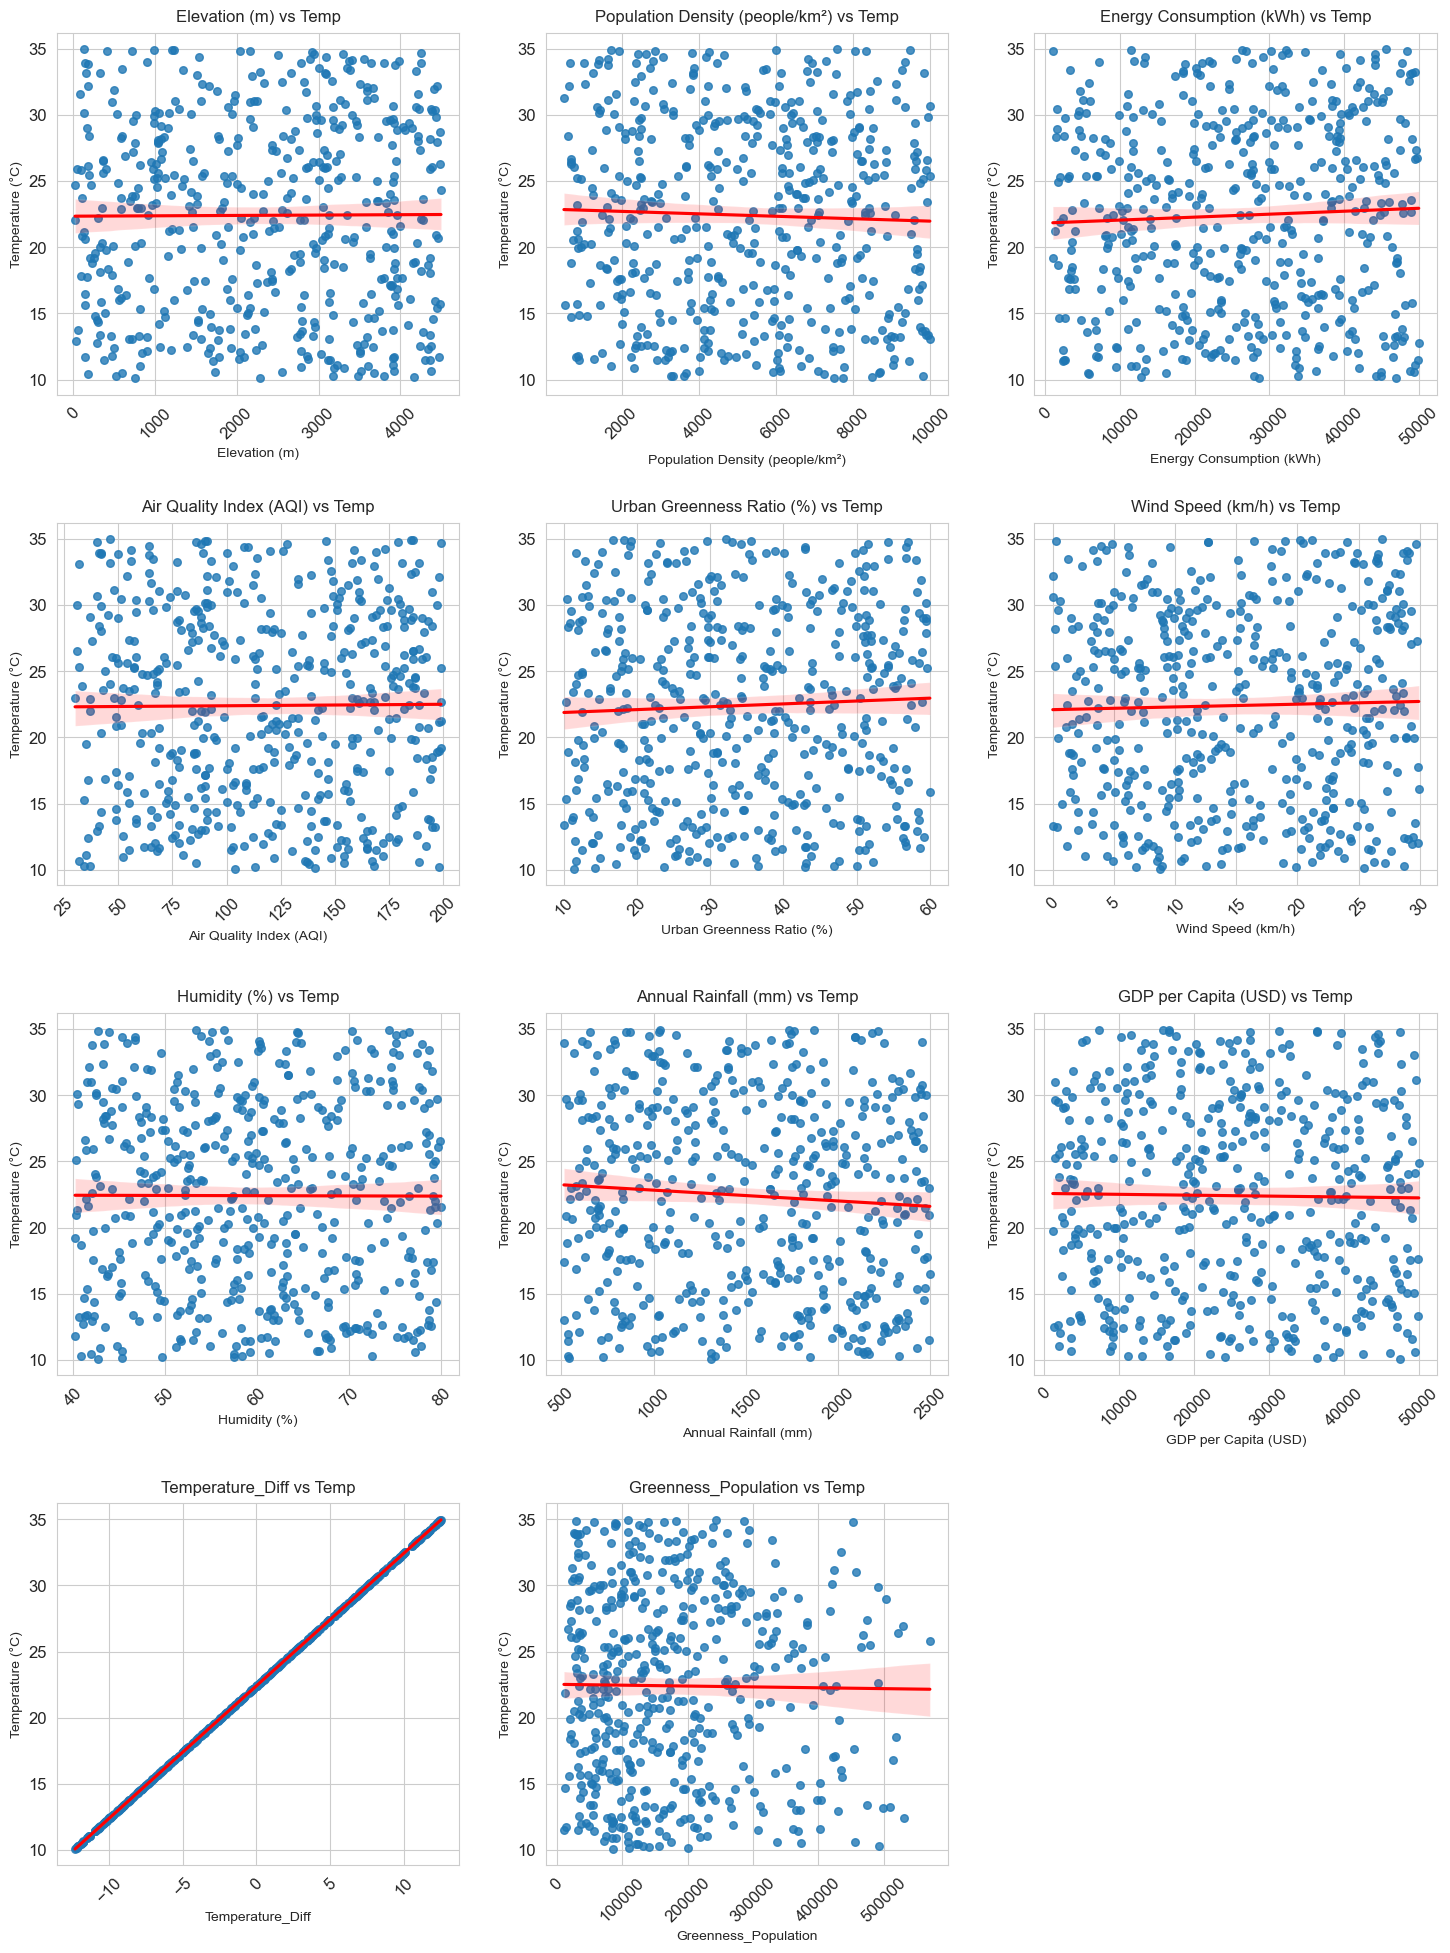

Combined scatter plots saved as 'D:/桌面/数据挖掘project/scatter_plots_combined.png'


In [113]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()
for idx, feature in enumerate(numeric_cols):
    sns.regplot(x=df[feature], y=df['Temperature (°C)'], scatter_kws={'s': 30}, line_kws={'color': 'red'}, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Temp', fontsize=12, pad=8)
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Temperature (°C)', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(numeric_cols), 12):
    fig.delaxes(axes[idx])

plt.tight_layout(pad=2.0)
plt.savefig('D:/桌面/数据挖掘project/scatter_plots_combined.png', dpi=300, bbox_inches='tight')
plt.show()
print("Combined scatter plots saved as 'D:/桌面/数据挖掘project/scatter_plots_combined.png'")

  The `scatter_plots_combined.png` figure contains multiple scatter plots, each showing the relationship between **Temperature (°C)** and a single feature (e.g., **Urban Greenness Ratio (%)**, **Population Density (people/km²)**, etc.). Each plot displays data points for all 500 cities, with **Temperature (°C)** on the y-axis and the respective feature on the x-axis. The scatter plots reveal that most features exhibit no clear linear trend with temperature, as the points are widely dispersed, confirming the weak correlations observed in the coefficients.


- **Correlation Heatmap**:  

C:\Users\33615\AppData\Local\Temp\ipykernel_6588\1740311227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_corr.index, y=temp_corr.values, palette=colors)


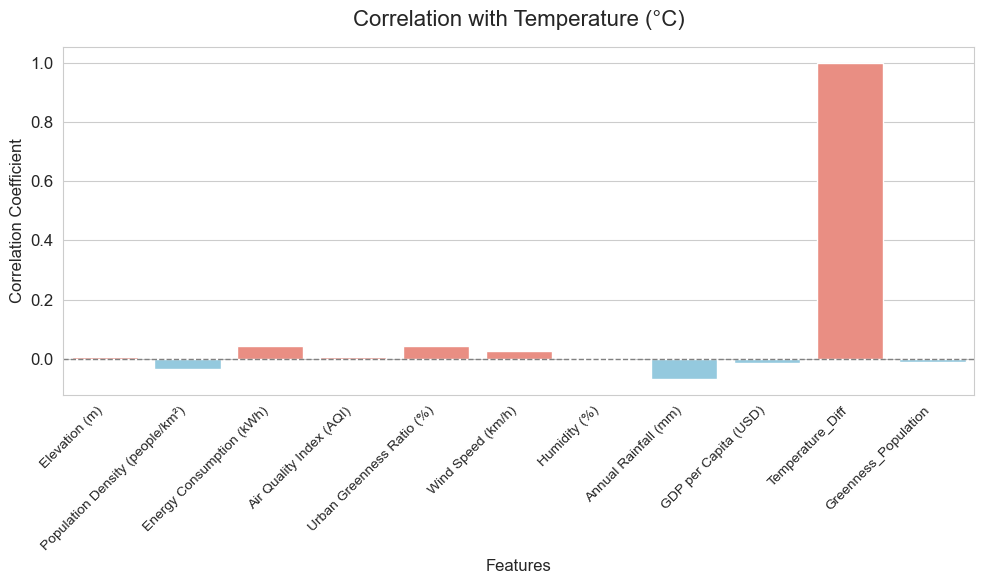

Correlation bar plot saved as 'D:/桌面/数据挖掘project/temperature_correlation_bar.png'


In [114]:
plt.figure(figsize=(10, 6))
temp_corr = corr_matrix['Temperature (°C)'].drop('Temperature (°C)')  
colors = ['salmon' if x >= 0 else 'skyblue' for x in temp_corr]
sns.barplot(x=temp_corr.index, y=temp_corr.values, palette=colors)
plt.title('Correlation with Temperature (°C)', fontsize=16, pad=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig('D:/桌面/数据挖掘project/temperature_correlation_bar.png', dpi=300, bbox_inches='tight')
plt.show()
print("Correlation bar plot saved as 'D:/桌面/数据挖掘project/temperature_correlation_bar.png'")

  The `temperature_correlation_bar.png` figure is a bar chart illustrating the correlation coefficients of each feature with **Temperature (°C)**. The x-axis represents the correlation values (ranging from -0.1 to 0.1), and the y-axis lists the features. Positive correlations (e.g., **Energy Consumption (kWh)**, **Urban Greenness Ratio (%)**) are shown as bars extending to the right, while negative correlations (e.g., **Annual Rainfall (mm)**, **Population Density (people/km²)**) extend to the left. The chart highlights the relative strength of each feature's relationship with temperature, with **Annual Rainfall (mm)** having the most noticeable negative correlation.

- **Correlation Heatmap**:  

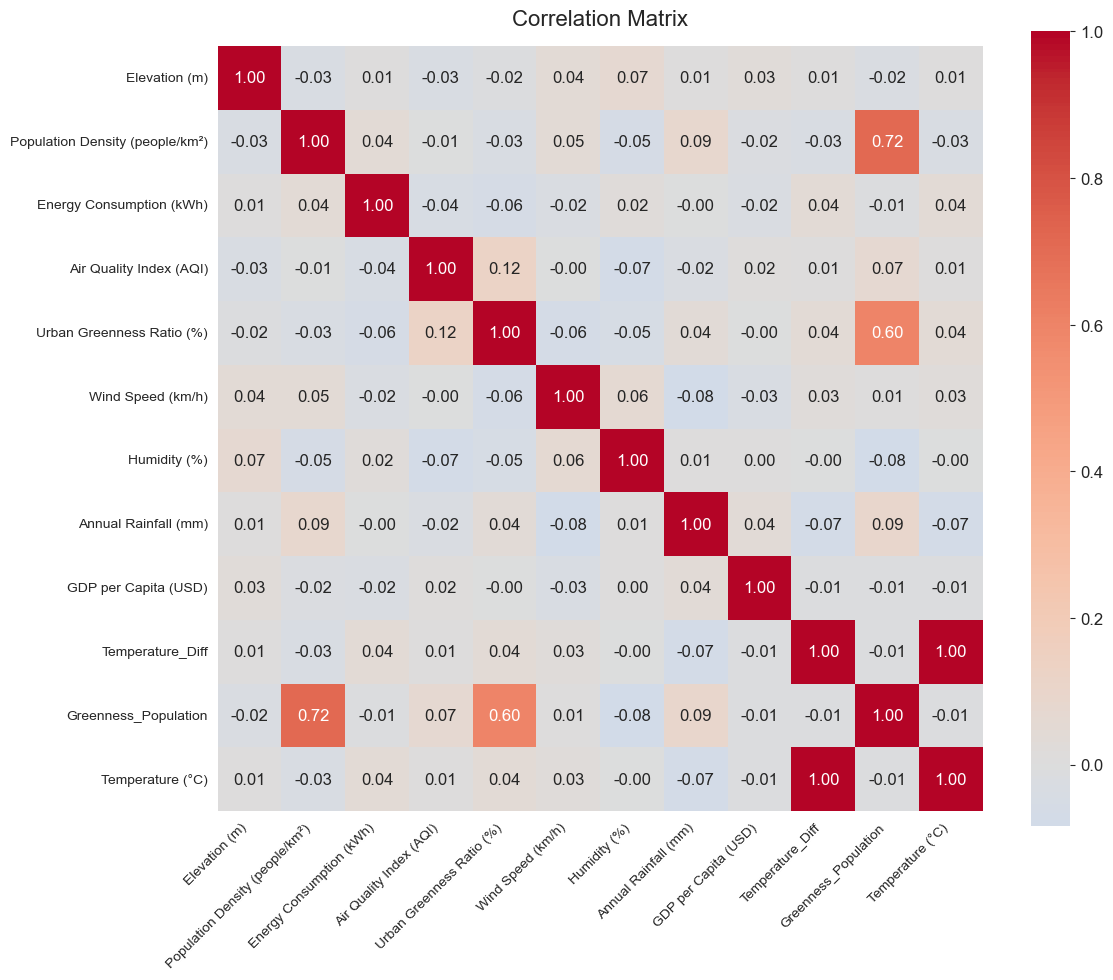

Correlation heatmap saved as 'D:/桌面/数据挖掘project/correlation_heatmap.png'


In [116]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0, square=True)
plt.title('Correlation Matrix', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('D:/桌面/数据挖掘project/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("Correlation heatmap saved as 'D:/桌面/数据挖掘project/correlation_heatmap.png'")

  The `correlation_heatmap.png` figure is a heatmap displaying the pairwise correlations among all numerical features in the dataset. The heatmap uses a color gradient (e.g., from blue to red) to represent correlation values, with annotations showing the exact coefficients. The diagonal shows perfect correlations (1.0) for each feature with itself. The heatmap helps identify not only the correlations with **Temperature (°C)** but also inter-feature relationships, such as potential collinearity between features like **Urban Greenness Ratio (%)** and **Greenness_Population**.

These visualizations collectively confirm the weak linear relationships between **Temperature (°C)** and most features, while also providing insights into potential non-linear patterns and inter-feature interactions, which will be valuable for subsequent modeling steps.